# Logistic Regression

# 1. Data Exploration

In [3]:
import pandas as pd
df = pd.read_csv(r"C:\Users\G.S.AZARUDDIN\Downloads\Titanic_test.csv")

In [12]:
print(df.info())
print(df.describe())
print(df.head())
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209  

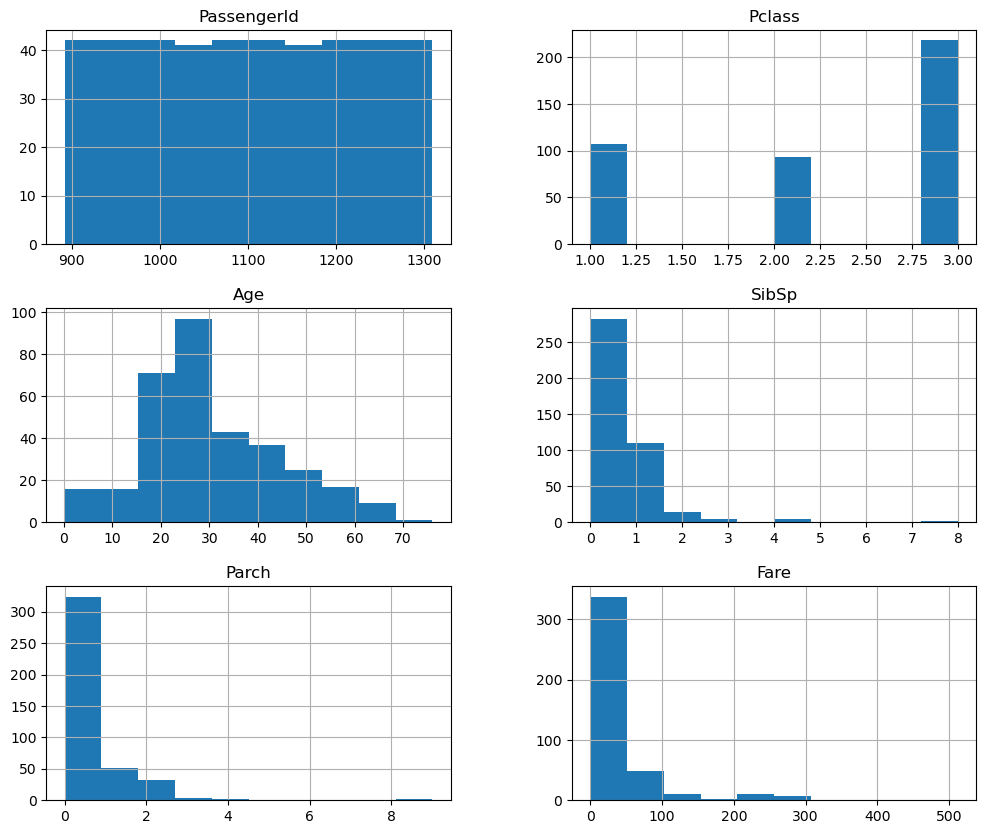

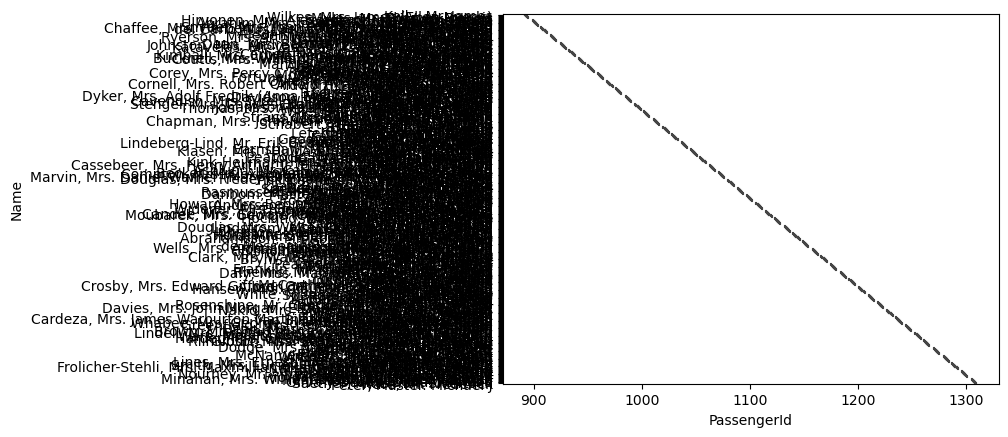

KeyError: 'target_variable'

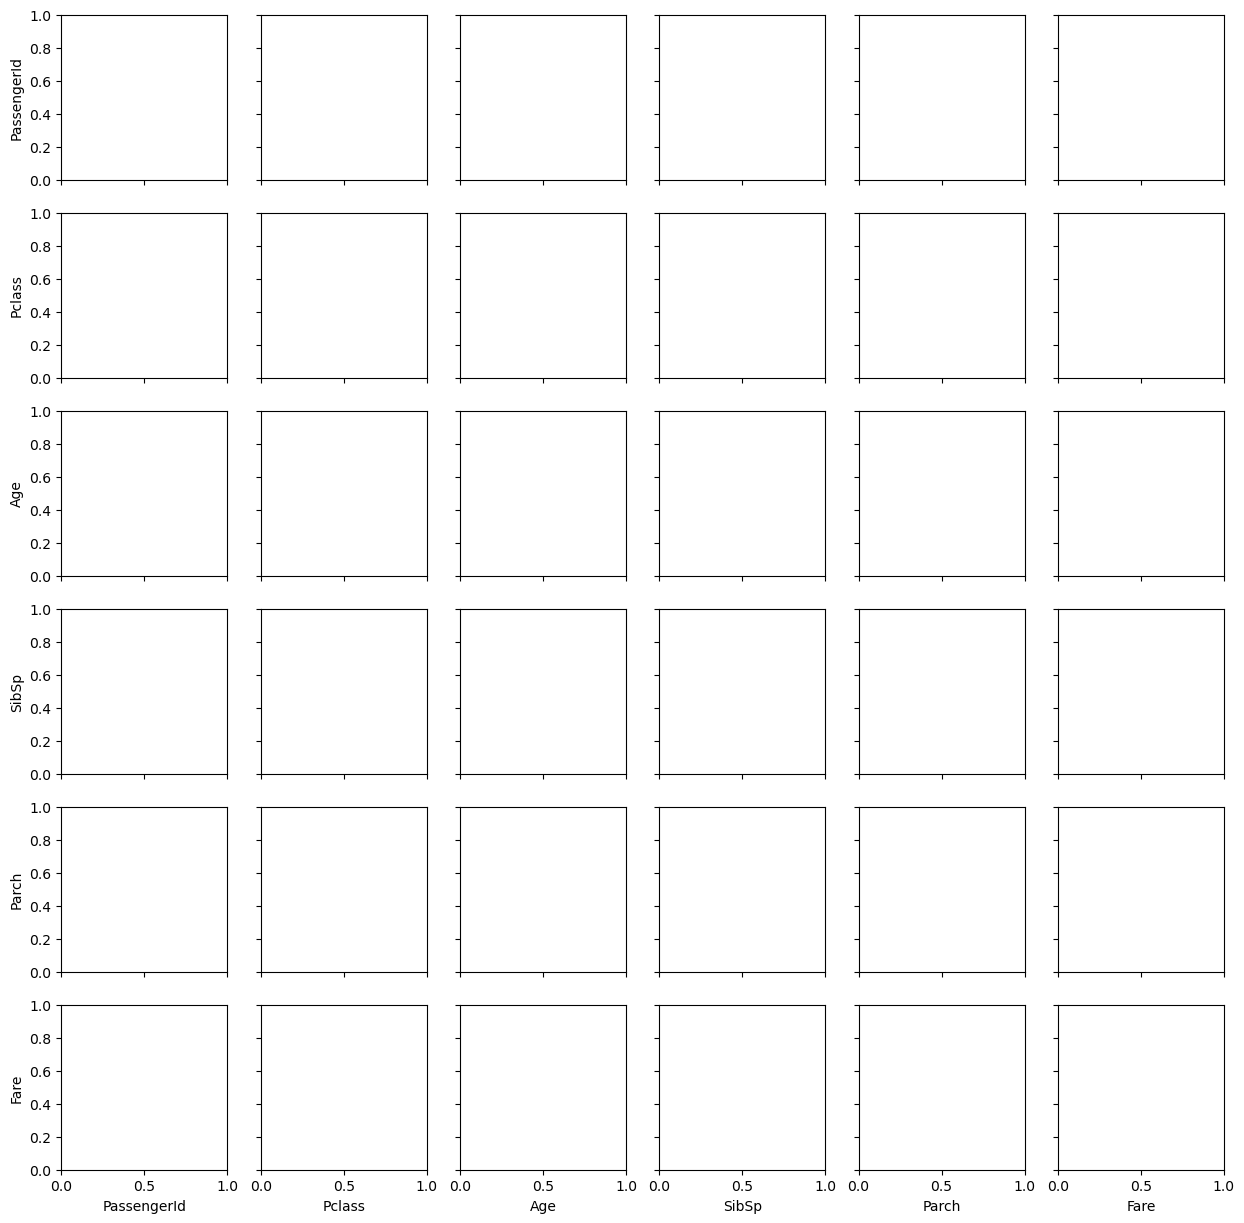

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(figsize=(12, 10))
plt.show()
sns.boxplot(data=df, x='PassengerId', y='Name')
plt.show()
sns.pairplot(df, hue='target_variable')
plt.show()

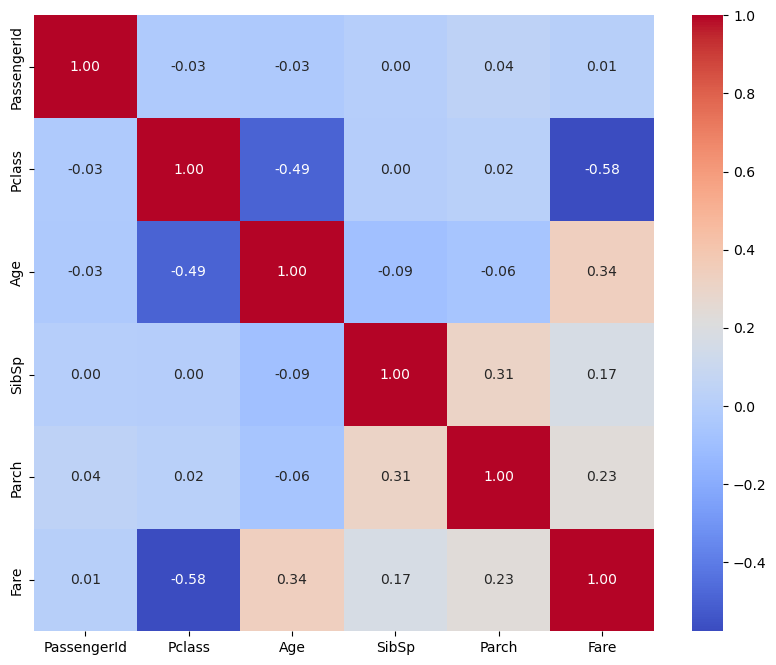

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Data Preprocessing


In [14]:
df.fillna(df.mean(), inplace=True)

C:\Users\G.S.AZARUDDIN\AppData\Local\Temp\ipykernel_27960\820435583.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [68]:
df = pd.get_dummies(df, columns=['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'])


KeyError: "None of [Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',\n       'Ticket', 'Fare', 'Cabin', 'Embarked'],\n      dtype='object')] are in the [columns]"

# 3. Model Building

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
df = pd.read_csv(r"C:\Users\G.S.AZARUDDIN\Downloads\Titanic_train.csv")
X = df.drop('PassengerId', axis=1)
y = df['Name']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

# 4. Model Evaluation:

In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC Score: {roc_auc}')
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


NameError: name 'X_test_scaled' is not defined

# 5. Interpretation

In [69]:
coefficients = model.coef_[0]
features = X.columns
for feature, coef in zip(features, coefficients):
    print(f'Feature: {feature}, Coefficient: {coef}')


AttributeError: 'LogisticRegression' object has no attribute 'coef_'

b. Discuss the significance of features:

Interpret the coefficients in terms of their effect on the target variable. Positive coefficients increase the probability of the target variable, while negative coefficients decrease it.

# 6. Deployment with Streamlit

In [71]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.load('path_to_your_trained_model.pkl')  
scaler = StandardScaler()
scaler.load('path_to_your_scaler.pkl') 
st.title('Logistic Regression Model Prediction')

features = []
for feature in X.columns:
    value = st.number_input(f'Enter value for {feature}')
    features.append(value)

input_data = np.array(features).reshape(1, -1)
input_data_scaled = scaler.transform(input_data)
prediction = model.predict(input_data_scaled)
prediction_prob = model.predict_proba(input_data_scaled)[:, 1]
st.write(f'Prediction: {prediction[0]}')
st.write(f'Probability of target variable: {prediction_prob[0]:.2f}')


AttributeError: 'LogisticRegression' object has no attribute 'load'

In [72]:
streamlit run app.py

SyntaxError: invalid syntax (3737097518.py, line 1)